**EDA on Streaming OULAD**

In [72]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ouladstr.csv')

We next merge all data rows correspond to each (student, module, presentation).

In [9]:
dfs = df.drop(['dataplus','date','score'], axis=1)
student_feats = ['gender','region','highest_education','imd_band','age_band',
                 'num_of_prev_attempts','disability','studied_credits','final_result']
tag = ['id_student','code_module','code_presentation']
X1 = dfs.drop(student_feats,axis=1).groupby(tag).sum()
X2y = dfs[tag+student_feats].groupby(tag).mean()
dfc = pd.concat([X1,X2y],axis=1)

We have previously identified features tied to each unique student. Next we identify the interaction features.

In [11]:
interact_feats = list(df.columns[13:-2])
interact_feats

['dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

We next look at correlations between the interaction features, and then between the student features, and then between both sets of these.

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
dualpane,1.000000,-0.063711,0.277795,0.166344,-0.007104,0.309164,0.010325,0.021025,0.518772,0.245939,0.194453,0.523307,0.559241,0.268406,0.054947,0.058421,-0.014368,0.370600,0.230289
externalquiz,-0.063711,1.000000,-0.054807,0.117913,0.143077,0.244016,-0.055072,0.301327,-0.067700,0.201289,0.213265,-0.068145,-0.078164,-0.129782,-0.002530,0.209209,-0.014564,0.402280,0.352577
folder,0.277795,-0.054807,1.000000,0.084475,-0.006715,0.195242,-0.046738,0.050770,0.351322,-0.036176,0.008953,0.393498,0.300689,0.314380,0.005149,0.043170,-0.012360,0.308735,0.095774
forumng,0.166344,0.117913,0.084475,1.000000,0.053276,0.737192,0.083147,0.207212,0.261656,0.116459,0.214977,0.183242,0.206056,0.189367,0.011006,0.177076,0.098426,0.375550,0.404031
glossary,-0.007104,0.143077,-0.006715,0.053276,1.000000,0.091269,-0.011669,0.090139,-0.002620,0.023932,0.049369,-0.011327,-0.003930,-0.027192,-0.000363,0.078753,0.000154,0.151127,0.132092
homepage,0.309164,0.244016,0.195242,0.737192,0.091269,1.000000,0.171484,0.287351,0.555706,0.229211,0.322141,0.381133,0.412228,0.401823,0.019653,0.292268,0.044241,0.682273,0.610523
htmlactivity,0.010325,-0.055072,-0.046738,0.083147,-0.011669,0.171484,1.000000,0.095456,0.309361,-0.036351,0.008305,0.144624,0.304222,0.221409,-0.000608,0.008098,-0.012420,0.254995,0.090751
oucollaborate,0.021025,0.301327,0.050770,0.207212,0.090139,0.287351,0.095456,1.000000,0.141171,-0.056081,0.105488,0.044707,0.092693,0.078818,0.003927,0.203773,-0.014846,0.323239,0.193159
oucontent,0.518772,-0.067700,0.351322,0.261656,-0.002620,0.555706,0.309361,0.141171,1.000000,0.194942,0.266158,0.628585,0.714356,0.482083,0.015520,0.129610,-0.030819,0.605069,0.352727
ouelluminate,0.245939,0.201289,-0.036176,0.116459,0.023932,0.229211,-0.036351,-0.056081,0.194942,1.000000,0.097864,0.272032,0.219865,0.119613,-0.001670,0.087434,-0.001436,0.309847,0.264952


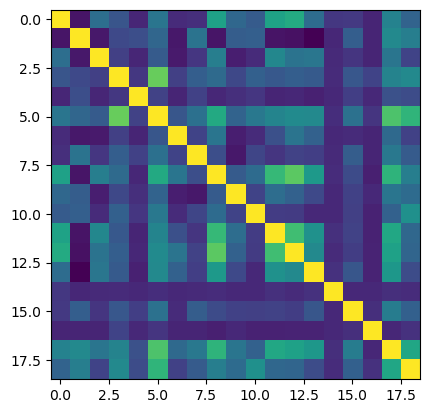

In [20]:
plt.imshow(dfc[interact_feats].corr())
dfc[interact_feats].corr()

`homepage` appears correlated with quite a few things (not a surprise and maybe not informative) ... otherwise I can't tell?

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,studied_credits,final_result
gender,1.000000,0.012644,-0.067283,-0.076905,0.032714,0.025170,0.043220,-0.028086,0.049740
region,0.012644,1.000000,-0.066701,-0.127836,-0.015063,0.009064,-0.047444,0.026012,-0.018522
highest_education,-0.067283,-0.066701,1.000000,0.126581,0.101349,-0.041039,-0.079344,0.017732,0.140170
imd_band,-0.076905,-0.127836,0.126581,1.000000,0.071631,-0.043058,-0.064836,-0.037520,0.117180
age_band,0.032714,-0.015063,0.101349,0.071631,1.000000,0.005903,-0.023550,-0.076273,0.068006
num_of_prev_attempts,0.025170,0.009064,-0.041039,-0.043058,0.005903,1.000000,0.056532,0.180541,-0.090634
disability,0.043220,-0.047444,-0.079344,-0.064836,-0.023550,0.056532,1.000000,0.052341,-0.068242
studied_credits,-0.028086,0.026012,0.017732,-0.037520,-0.076273,0.180541,0.052341,1.000000,-0.147055
final_result,0.049740,-0.018522,0.140170,0.117180,0.068006,-0.090634,-0.068242,-0.147055,1.000000


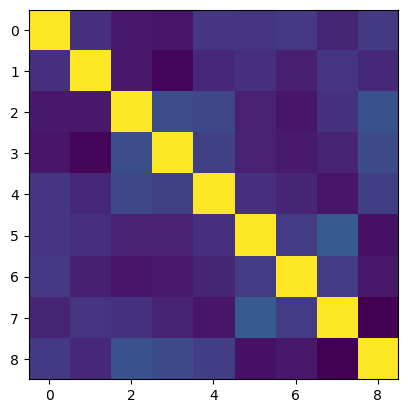

In [19]:
plt.imshow(dfc[student_feats].corr())
dfc[student_feats].corr()

Not much correlation here.

,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,...,url,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,studied_credits,final_result
dualpane,1.000000,-0.063711,0.277795,0.166344,-0.007104,0.309164,0.010325,0.021025,0.518772,0.245939,...,0.230289,-0.135707,-0.009101,0.025540,0.033753,0.041552,-0.033123,-0.019857,-0.004791,0.151616
externalquiz,-0.063711,1.000000,-0.054807,0.117913,0.143077,0.244016,-0.055072,0.301327,-0.067700,0.201289,...,0.352577,0.002207,-0.018420,0.048169,0.043599,0.032642,0.011682,0.008813,0.005628,0.098264
folder,0.277795,-0.054807,1.000000,0.084475,-0.006715,0.195242,-0.046738,0.050770,0.351322,-0.036176,...,0.095774,-0.111573,0.013665,0.014228,0.013267,-0.018719,-0.009143,-0.017074,0.044274,0.143381
forumng,0.166344,0.117913,0.084475,1.000000,0.053276,0.737192,0.083147,0.207212,0.261656,0.116459,...,0.404031,0.035840,-0.023016,0.046524,0.053541,0.149996,-0.039113,-0.017306,-0.010263,0.277218
glossary,-0.007104,0.143077,-0.006715,0.053276,1.000000,0.091269,-0.011669,0.090139,-0.002620,0.023932,...,0.132092,0.025239,0.002481,0.011691,0.011400,0.023612,-0.005031,0.007784,-0.009322,0.051210
homepage,0.309164,0.244016,0.195242,0.737192,0.091269,1.000000,0.171484,0.287351,0.555706,0.229211,...,0.610523,-0.062653,-0.018915,0.079583,0.071032,0.148021,-0.058469,-0.019951,0.004747,0.396959
htmlactivity,0.010325,-0.055072,-0.046738,0.083147,-0.011669,0.171484,1.000000,0.095456,0.309361,-0.036351,...,0.090751,-0.106698,0.007405,-0.015373,-0.003152,0.015869,-0.023082,0.006248,0.054834,0.040853
oucollaborate,0.021025,0.301327,0.050770,0.207212,0.090139,0.287351,0.095456,1.000000,0.141171,-0.056081,...,0.193159,-0.015796,0.006556,0.046632,0.037600,0.076995,-0.013328,0.002751,-0.005028,0.179911
oucontent,0.518772,-0.067700,0.351322,0.261656,-0.002620,0.555706,0.309361,0.141171,1.000000,0.194942,...,0.352727,-0.168069,-0.006293,0.047062,0.053659,0.083546,-0.055849,-0.038139,-0.019585,0.341305
ouelluminate,0.245939,0.201289,-0.036176,0.116459,0.023932,0.229211,-0.036351,-0.056081,0.194942,1.000000,...,0.264952,-0.037712,0.017158,0.011364,0.017541,0.036009,0.013749,0.005472,0.015277,0.062969


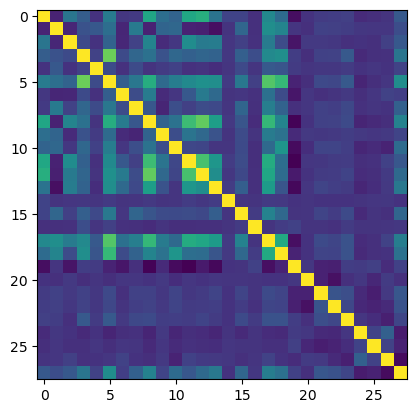

In [23]:
plt.imshow(dfc.corr())
dfc.corr()

We next look at the distribution of features.

In [58]:
len(student_feats), len(interact_feats)

(8, 19)

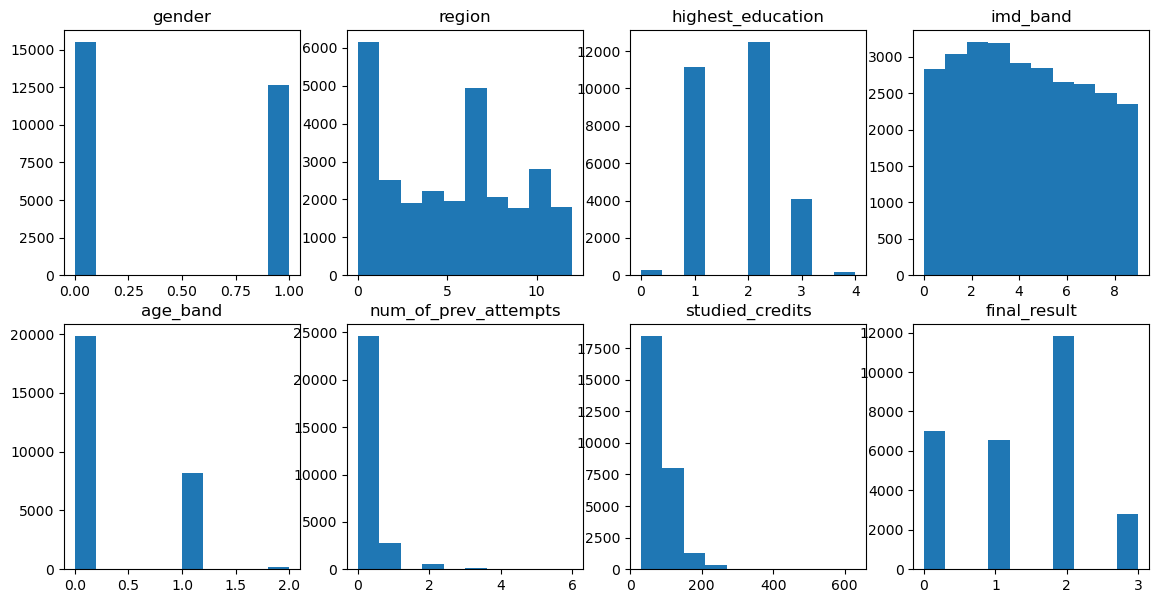

In [57]:
fig, axs = plt.subplots(nrows=2,ncols=4, figsize=(14,7))

for idx, feature in enumerate(dfc[student_feats]): 
    y, x = idx//4, idx%4
    axs[y, x].hist(dfc[feature])
    axs[y, x].set_title(feature)

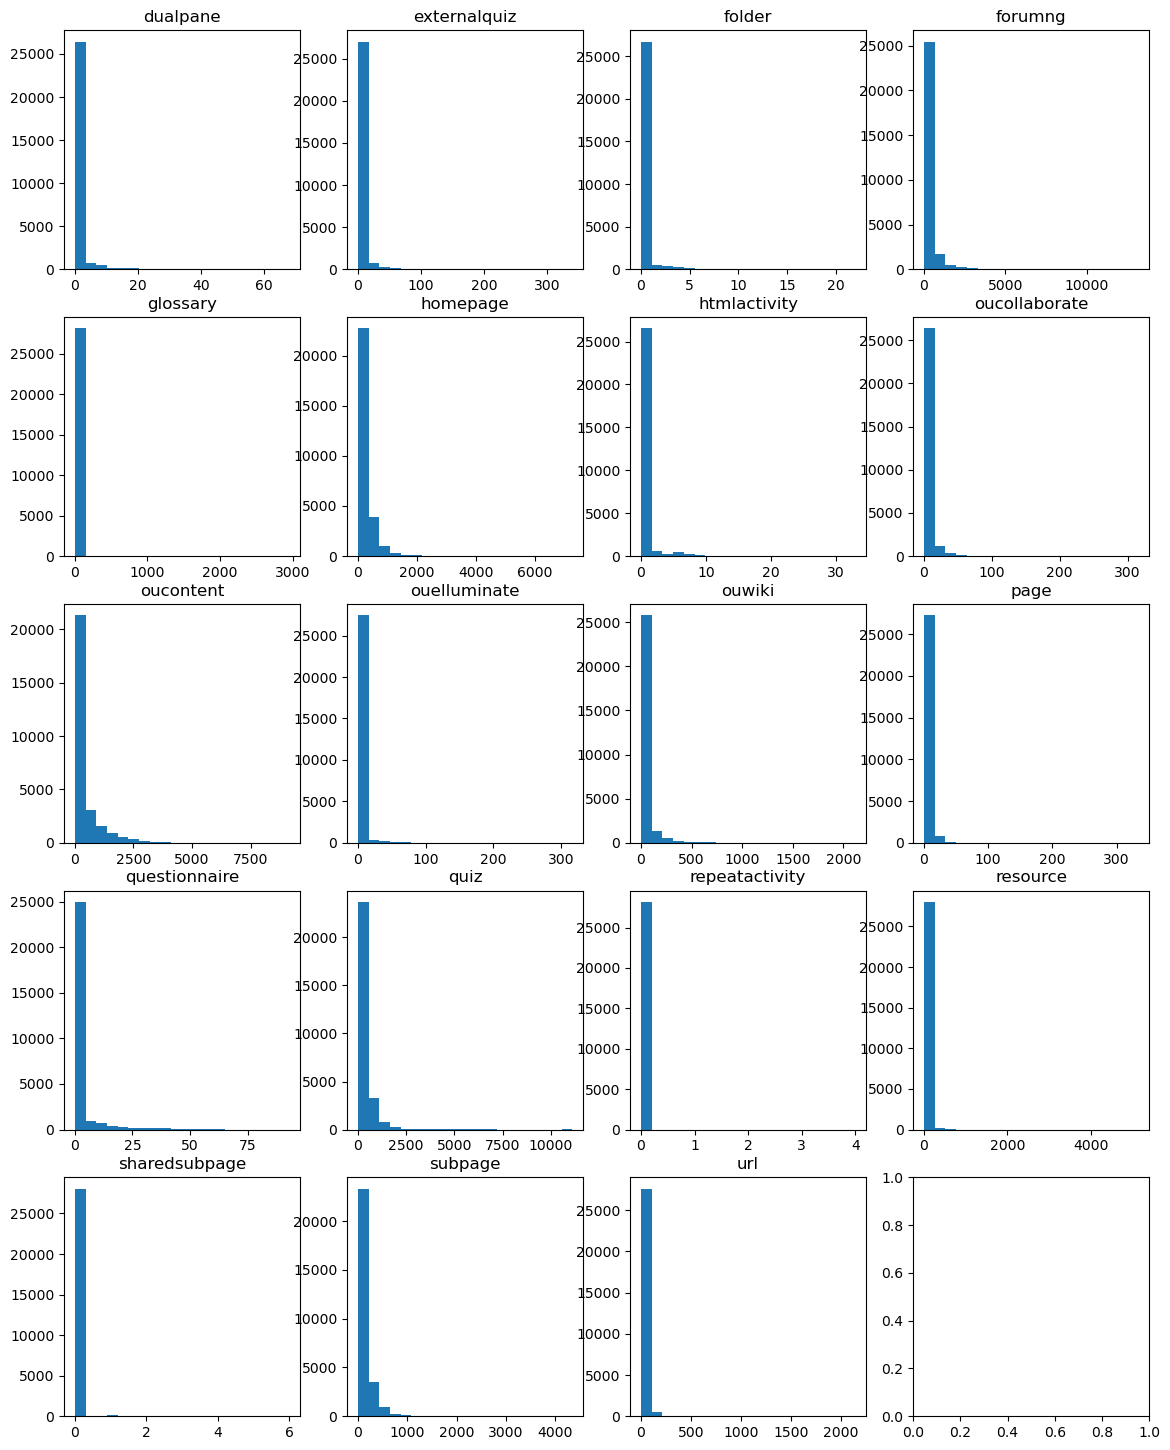

In [62]:
fig, axs = plt.subplots(nrows=5,ncols=4, figsize=(14,18))

for idx, feature in enumerate(dfc[interact_feats]): 
    y, x = idx//4, idx%4
    axs[y, x].hist(dfc[feature], bins=20)
    axs[y, x].set_title(feature)

It may be that (even after aggregation) there are lots of zero values. Let's see how many ...

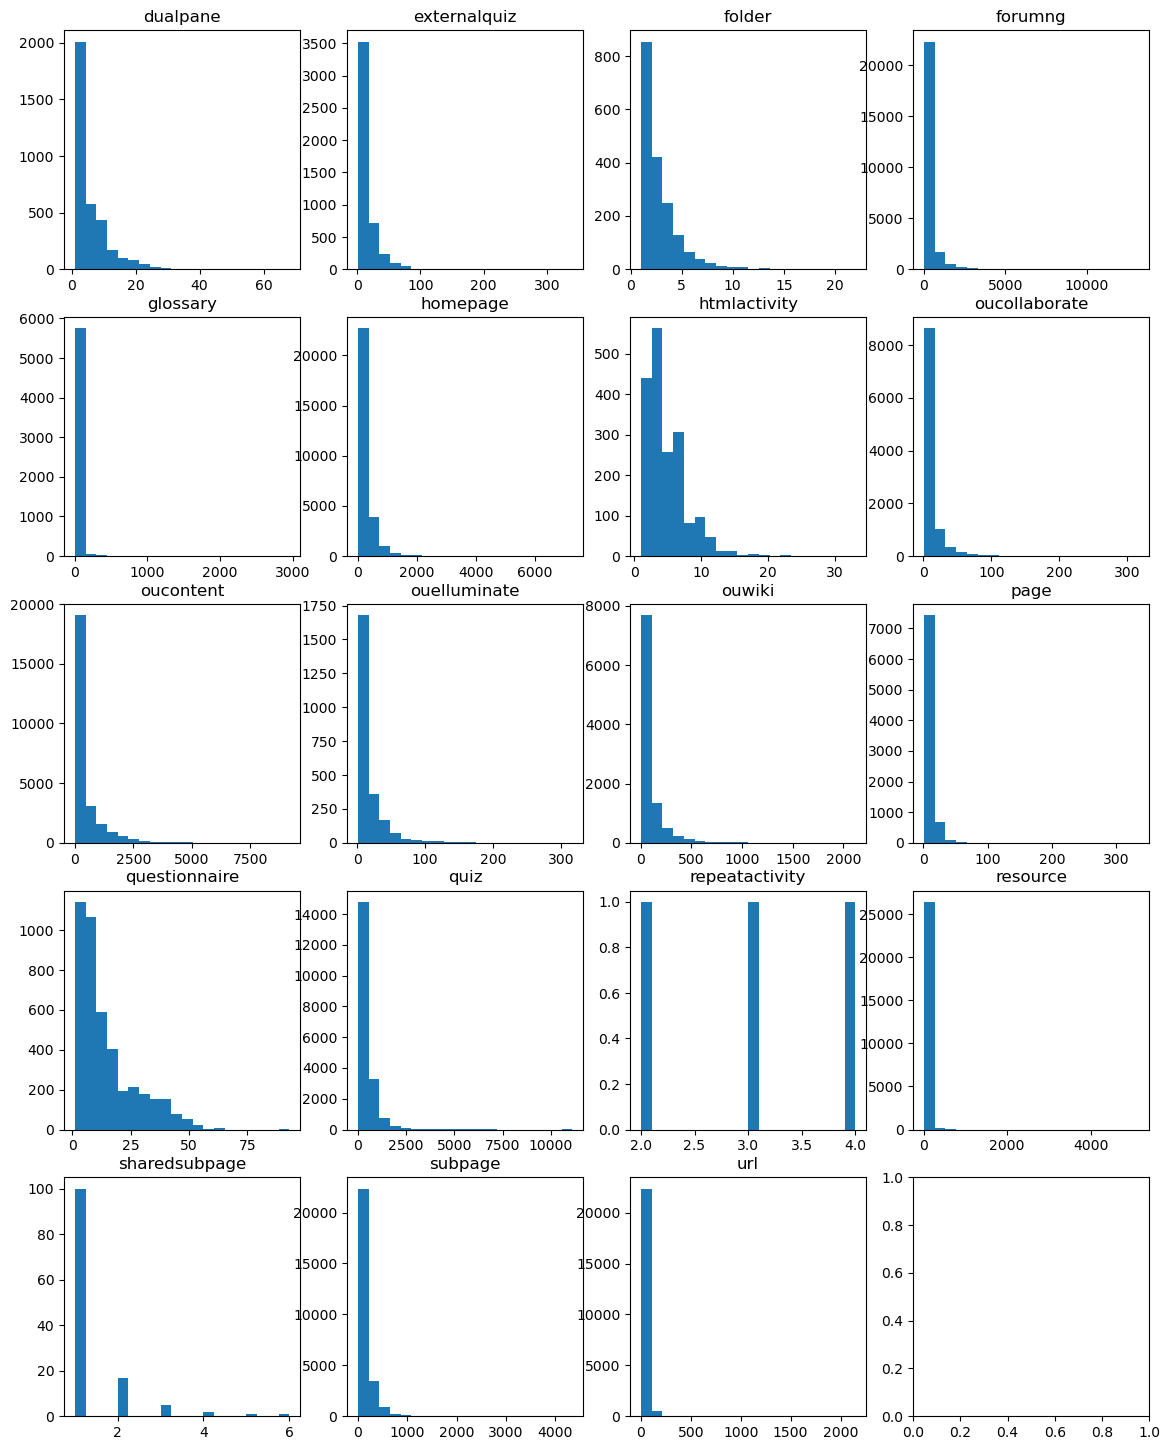

In [63]:
fig, axs = plt.subplots(nrows=5,ncols=4, figsize=(14,18))

for idx, feature in enumerate(dfc[interact_feats]): 
    y, x = idx//4, idx%4
    z = dfc[feature]
    axs[y, x].hist(z[z > 0], bins=20)
    axs[y, x].set_title(feature)

In [69]:
n = len(dfc)
print("Feature / # students / % of students with no instances")
for feature in interact_feats:
    z = dfc[feature]
    students_wo_feature = len(z[z==0])
    print(feature, "/", students_wo_feature, "/", students_wo_feature/n)

Feature / # students / % of students with no instances
dualpane / 24707 / 0.876943281039256
externalquiz / 23541 / 0.8355576063036843
folder / 26360 / 0.9356143962518634
forumng / 3169 / 0.11247959111237311
glossary / 22352 / 0.7933555760630369
homepage / 42 / 0.0014907361397032725
htmlactivity / 26344 / 0.9350464967700717
oucollaborate / 17869 / 0.6342372400085184
oucontent / 2271 / 0.08060623269681266
ouelluminate / 25813 / 0.9161993327181089
ouwiki / 18127 / 0.64339461915241
page / 19964 / 0.7085965784056222
questionnaire / 23910 / 0.8486547881025058
quiz / 8929 / 0.3169234045573933
repeatactivity / 28171 / 0.999893518847164
resource / 1611 / 0.057180379072904096
sharedsubpage / 28048 / 0.9955277915808902
subpage / 1003 / 0.035600198764818625
url / 5266 / 0.1869099169447008


We next try to draw histograms of these colored by `final_result`.

(array([2.764e+03, 5.800e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.,  210.,  420.,  630.,  840., 1050., 1260., 1470., 1680.,
        1890., 2100.]),
 <BarContainer object of 10 artists>)

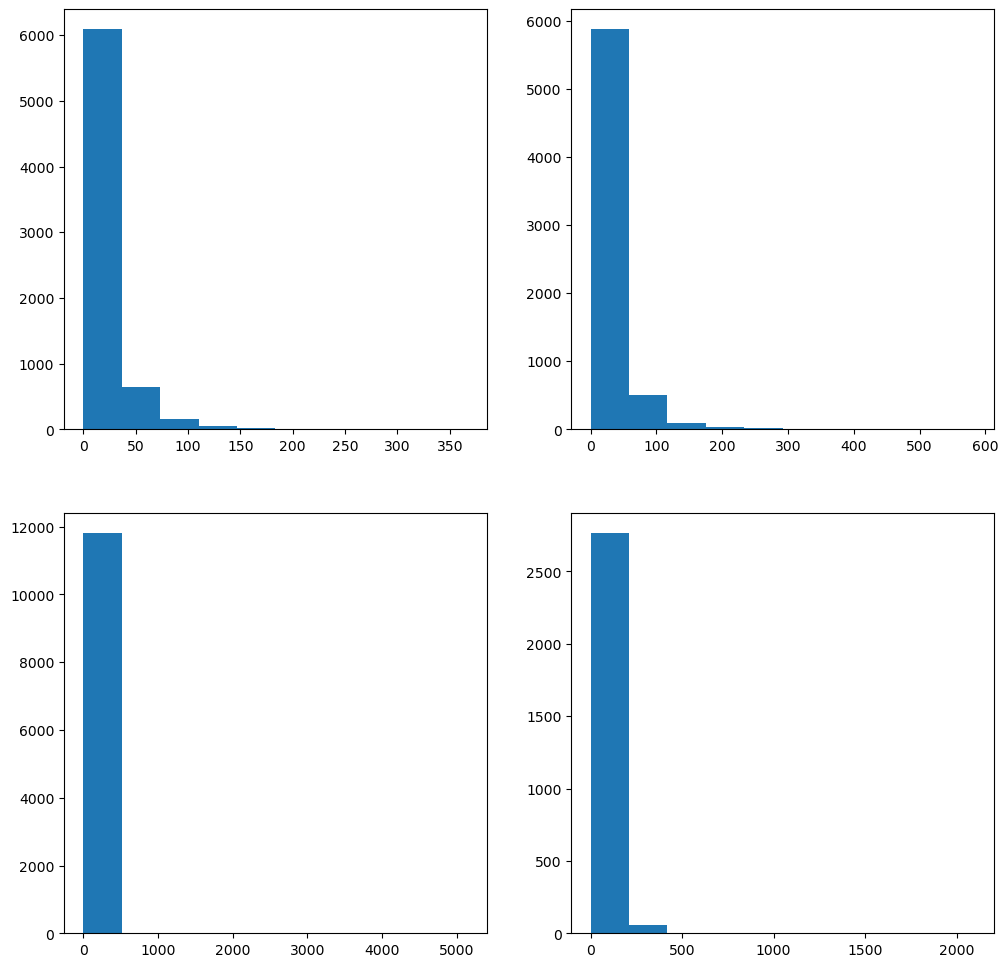

In [98]:
# currently a proof of concept
#sns.histplot(data=dfc, x='resource', hue='final_result')
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

axs[0,0].hist(dfc[dfc.final_result==0.0]['resource'])
axs[0,1].hist(dfc[dfc.final_result==1.0]['resource'])
axs[1,0].hist(dfc[dfc.final_result==2.0]['resource'])
axs[1,1].hist(dfc[dfc.final_result==3.0]['resource'])


This might be skewed by a small number of extreme outliers, so let's see what happens when we remove these ...

In [82]:
dfc[dfc.final_result==0.0].resource.describe()

count    6985.000000
mean       17.449105
std        25.962961
min         0.000000
25%         2.000000
50%         9.000000
75%        22.000000
max       367.000000
Name: resource, dtype: float64

In [108]:
z = dfc[dfc.final_result==0.0].resource
len(z[z<=z.quantile(.98)])

6847

Text(0.5, 1.0, 'Distinction')

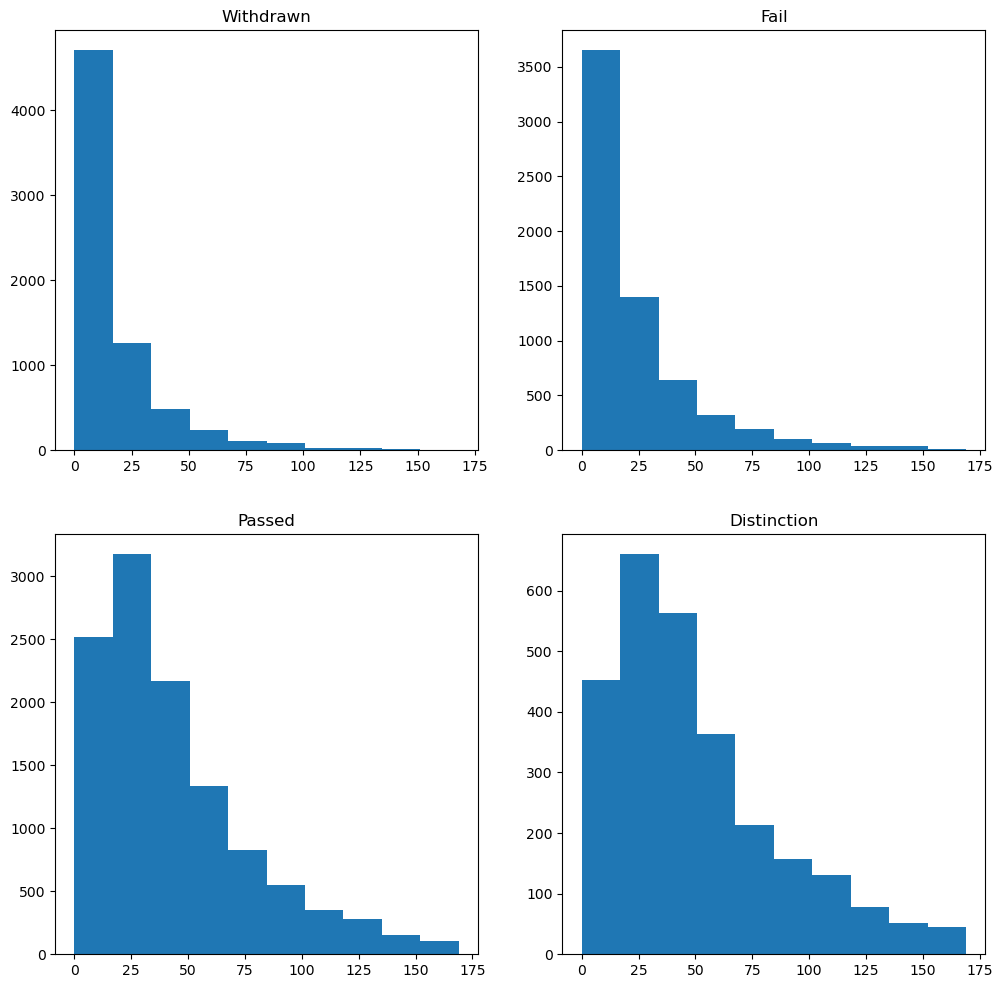

In [110]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.resource <= dfc.resource.quantile(.98)]

axs[0,0].hist(z[z.final_result==0.0]['resource'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['resource'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['resource'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['resource'])
axs[1,1].set_title('Distinction')


Text(0.5, 1.0, 'Distinction')

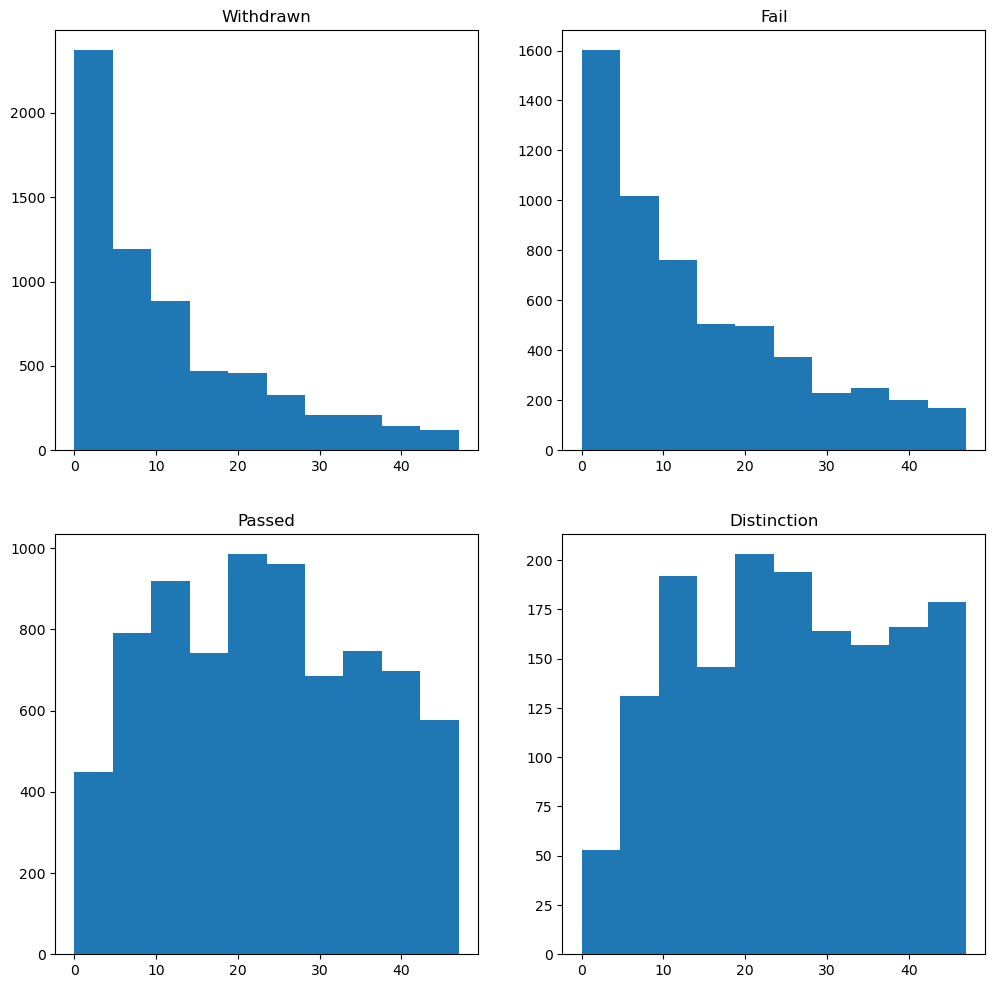

In [111]:
#sns.histplot(data=dfc[dfc.resource<=dfc.resource.quantile(.95)], x='resource', hue='final_result', bins=10)
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

z = dfc[dfc.resource <= dfc.resource.quantile(.75)]

axs[0,0].hist(z[z.final_result==0.0]['resource'])
axs[0,0].set_title('Withdrawn')
axs[0,1].hist(z[z.final_result==1.0]['resource'])
axs[0,1].set_title('Fail')
axs[1,0].hist(z[z.final_result==2.0]['resource'])
axs[1,0].set_title('Passed')
axs[1,1].hist(z[z.final_result==3.0]['resource'])
axs[1,1].set_title('Distinction')


By disregarding outliers, a trend becomes clear ... and it's not clear what's happening among those outliers.

<Axes: xlabel='resource', ylabel='Count'>

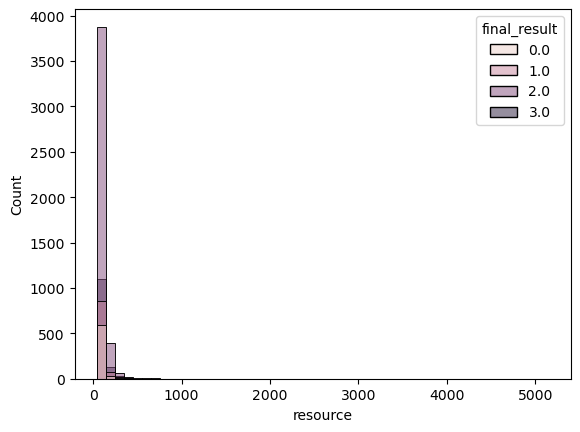

In [118]:
sns.histplot(data=dfc[dfc.resource>=dfc.resource.quantile(.75)], x='resource', hue='final_result', bins=50)
